In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.ProbBidClearing import ProbBidClearing

In [20]:
## Initialize ProbBidClearing Object

std = 10                  # standard deviation 
risky_mean = 20          # bid above RTP
conservative_mean = -15  # bid below RTP

clearer = ProbBidClearing(std, risky_mean, conservative_mean)

### Attitude Based Bidding

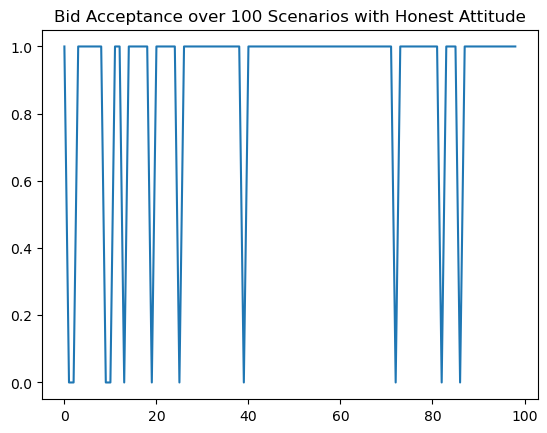

In [29]:
## Test if the discharge bid was accepted

# Sample bidding environment
RTP = 30.02044
bid = 36.13978
SOC = 0.5
attitude = "honest"

accept = []
n = 100

for i in range(1,n):
    accept.append(clearer.norm_prob_clear(RTP, bid, attitude, SOC))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with " + attitude.capitalize() + " Attitude")
plt.show()

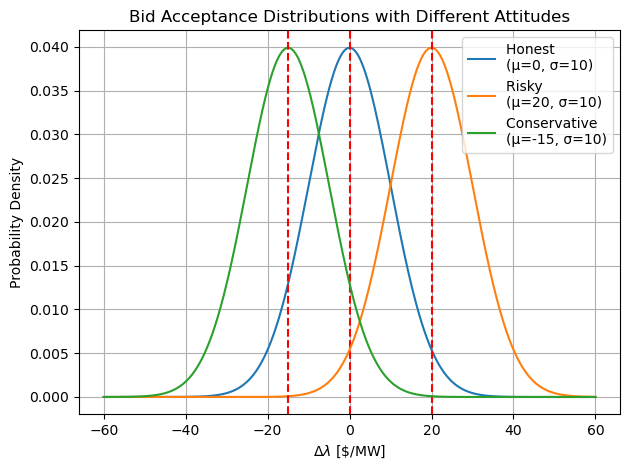

In [27]:
clearer.visualize_norm_attitudes()

### Custom Bidding

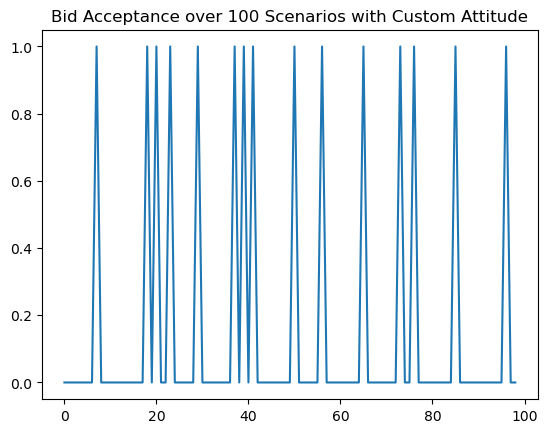

In [55]:
## Test if custom the discharge bid was accepted
bid = 40
mean = 0
std = 5

accept = []
n = 100

for i in range(1,n):
    accept.append(clearer.custom_norm_prob_clear(RTP, bid, SOC, mean, std))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with Custom Attitude")
plt.show()

### Time-Varying Bidding

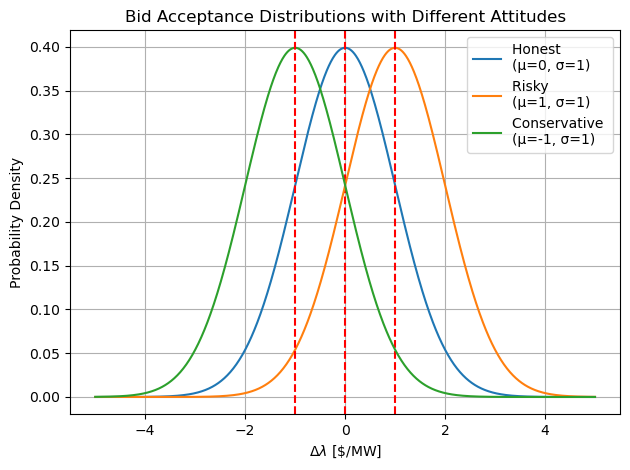

In [128]:
# Parameters for the normal distributions
attitudes = {
            "honest": 0,
            "risky": 1,
            "conservative": -1
}
std_dev = 1  # Same standard deviation

# Generate x values
x = np.linspace(- 5*std_dev, 5*std_dev, 1000)

# Plot each distribution
for label, mean in attitudes.items():
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label=f'{label.capitalize()} \n(μ={mean}, σ={std_dev})')
    # Add a vertical line for the mean
    plt.axvline(mean, color='red', linestyle='--', linewidth=1.5)

# Customize the plot
plt.title('Bid Acceptance Distributions with Different Attitudes')
plt.xlabel(r'$\Delta\lambda \text{ [\$/MW]}$')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# = \lambda^{RTP} - \lambda^b 